# Aula 5 - Grafos 2

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Grafos com NetworkX

_________

## 1) Grafos com networkx

Na aula de hoje, vamos aprender como usar a biblioteca [NetworkX!](https://networkx.org/) para a análise de grafos/redes em Python!

<img src="https://networkx.org/_static/networkx_logo.svg">

Primeiramente, se ainda não tiver instalado, instale a biblioteca com:

`!pip install networkx`

In [1]:
import networkx as nx

__________

Para vermos como a networkx funciona na prática, vamos resolver os exercícios da lista!

1. Implemente o grafo ilustrado pela figura abaixo, utilizando a representação baseada em uma matriz de adjacências. Em seguida, exiba a matriz que representa o grafo.

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/c5b98cc3-2c85-4d9a-b1e8-aaa4b1aba9b3.png width=300>

A classe para um grago de mão dupla é `Graph()`:

In [23]:
g1 = nx.Graph()

In [24]:
# adicionando um nó sem ligação
g1.add_node(0)
g1.add_node(1)
g1.add_node(2)
g1.add_node(3)
g1.add_node(4)
g1.add_node(5)
g1.add_node(6)

# adicionando as ligações:
g1.add_edge(1, 3)

g1.add_edge(3, 4)
g1.add_edge(3, 2)

g1.add_edge(4, 5)
g1.add_edge(4, 6)

g1.add_edge(5, 5)
g1.add_edge(5, 2)
g1.add_edge(5, 6)

In [25]:
g1

In [26]:
import matplotlib.pyplot as plt

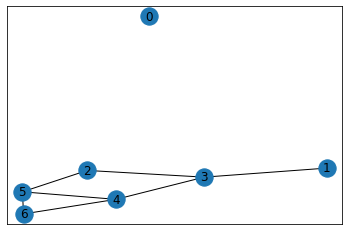

In [27]:
nx.draw_networkx(g1)

# pra quem não tiver no notebook
plt.show()

In [28]:
m1 = nx.adjacency_matrix(g1)

In [29]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

Por padrão, a matriz é representada de maneira esparsa:

In [30]:
m1

<7x7 sparse matrix of type '<class 'numpy.intc'>'
	with 15 stored elements in Compressed Sparse Row format>

In [31]:
nx.adjacency_data(g1)["nodes"]

[{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}]

Caso se deseje visualizar a matriz completa, densa:

In [21]:
m1.todense()

matrix([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 0]], dtype=int32)

In [37]:
# na ordem de linhas e colunas segundo a ordem numerica das labels

m1 = nx.adjacency_matrix(g1, nodelist=range(7))

m1.todense()

matrix([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 1],
        [0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 0]], dtype=int32)

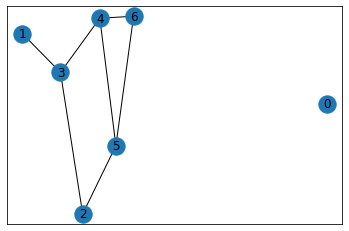

In [39]:
nx.draw_networkx(g1)

Lista de adjacência:

In [32]:
nx.generate_adjlist(g1)

<generator object generate_adjlist at 0x0000000009725448>

In [33]:
for item in nx.generate_adjlist(g1):
    
    print(item)

0
1 3
2 3 5
3 4
4 5 6
5 5 6
6


In [34]:
[item for item in nx.generate_adjlist(g1)]

['0', '1 3', '2 3 5', '3 4', '4 5 6', '5 5 6', '6']

Uma outra forma:

In [35]:
nx.adjacency_data(g1)

{'directed': False,
 'multigraph': False,
 'graph': [],
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6}],
 'adjacency': [[],
  [{'id': 3}],
  [{'id': 3}, {'id': 5}],
  [{'id': 1}, {'id': 4}, {'id': 2}],
  [{'id': 3}, {'id': 5}, {'id': 6}],
  [{'id': 4}, {'id': 5}, {'id': 2}, {'id': 6}],
  [{'id': 4}, {'id': 5}]]}

In [36]:
nx.adjacency_data(g1)["adjacency"]

[[],
 [{'id': 3}],
 [{'id': 3}, {'id': 5}],
 [{'id': 1}, {'id': 4}, {'id': 2}],
 [{'id': 3}, {'id': 5}, {'id': 6}],
 [{'id': 4}, {'id': 5}, {'id': 2}, {'id': 6}],
 [{'id': 4}, {'id': 5}]]

Caso queiramos percorrer o grafo, o networkx nos disponibiliza [algoritmos de percurso:](https://networkx.org/documentation/stable/reference/algorithms/simple_paths.html)

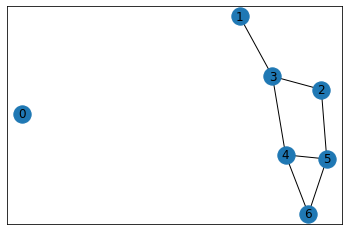

In [57]:
nx.draw_networkx(g1)

In [58]:
nx.all_simple_paths(g1, 1, 5)

<generator object _all_simple_paths_graph at 0x000000000A984648>

In [63]:
caminhos = []

for path in nx.all_simple_paths(g1, 1, 5):
    
    caminhos.append(path)
    
caminhos

[[1, 3, 4, 5], [1, 3, 4, 6, 5], [1, 3, 2, 5]]

In [64]:
[path for path in nx.all_simple_paths(g1, 1, 5)]

[[1, 3, 4, 5], [1, 3, 4, 6, 5], [1, 3, 2, 5]]

O networkx também disponibiliza [algoritmos de menor caminho!](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html)

In [65]:
# menor caminho sem considerar pesos!
# obs: pode não ser único!

nx.shortest_path(g1, 1, 5)

[1, 3, 4, 5]

In [66]:
[path for path in nx.all_shortest_paths(g1, 1, 5)]

[[1, 3, 4, 5], [1, 3, 2, 5]]

_____________

2. Implemente o grafo ilustrado pela figura abaixo, utilizando a representação baseada em uma lista de adjacências. Em seguida, observe a lista de adjacências que representa o grafo.

<img src=https://ycpcs.github.io/cs360-spring2019/lectures/images/lecture15/digraph.png width=300>

A classe para grafos de não única (grafos direcionais) é a `DiGraph()`:

In [74]:
g2 = nx.DiGraph()

g2.add_node(1)
g2.add_node(2)
g2.add_node(3)
g2.add_node(4)
g2.add_node(5)

g2.add_edge(1, 2)
g2.add_edge(1, 3)
g2.add_edge(1, 4)

# para ligação de mão dupla, é necessário repetir
g2.add_edge(2, 3)
g2.add_edge(3, 2)

g2.add_edge(5, 2)

g2.add_edge(4, 4)

In [73]:
m2 = nx.adjacency_matrix(g2).todense()

m2

matrix([[0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0]], dtype=int32)

In [82]:
nx.adjacency_data(g2)["nodes"]

[{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}]

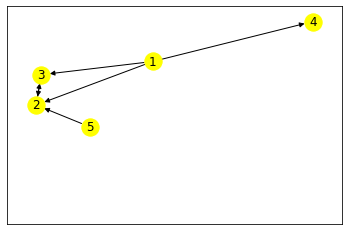

In [96]:
nx.draw_networkx(g2, node_color="yellow")

pos = nx.spring_layout(g2) 
# nx.draw_networkx_edges(g2, pos=pos, edgelist=[(4,4)], arrowstyle="<|-", style="dashed")

In [78]:
nx.adjacency_data(g2)["adjacency"]

[[{'id': 2}, {'id': 3}, {'id': 4}],
 [{'id': 3}],
 [{'id': 2}],
 [{'id': 4}],
 [{'id': 2}]]

Em um grafo direcionado (mão única), pode ser que caminhos não existam!

In [79]:
# 1 pro 2, ok!
[path for path in nx.all_simple_paths(g2, 1, 2)]

[[1, 2], [1, 3, 2]]

In [80]:
# 1 pro 5, caminho inexistente!
[path for path in nx.all_simple_paths(g2, 1, 5)]

[]

In [83]:
[path for path in nx.all_simple_paths(g2, 5, 4)]

[]

_____________

3. Implemente o grafo ponderado ilustrado pela figura abaixo, utilizando as representações baseadas em:

- matriz de adjacências;
- lista de adjacências.

Em seguida, exiba a matriz e a lista que representam o grafo.

<img src="https://ucarecdn.com/a67cb888-aa0c-424b-8c7f-847e38dd5691/" width=300>

Por fim, para representar um grafo ponderado de mão dupla (como o acima), basta usar o parâmetro "weight" no méotodo de adição de nós

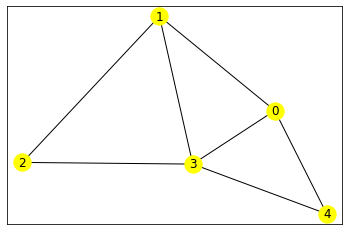

In [85]:
g3 = nx.Graph()

g3.add_node(0)
g3.add_node(1)
g3.add_node(2)
g3.add_node(3)
g3.add_node(4)

g3.add_edge(0, 4, weight=8)
g3.add_edge(0, 1, weight=3)
g3.add_edge(0, 3, weight=7)

g3.add_edge(1, 2, weight=1)
g3.add_edge(1, 3, weight=4)

g3.add_edge(2, 3, weight=2)

g3.add_edge(3, 4, weight=3)

nx.draw_networkx(g3, node_color="yellow")

Caso queira plotar com os pesos:

In [100]:
pos = nx.spring_layout(g3) 

pos

{0: array([-0.15137364, -0.48114254]),
 1: array([ 0.55009729, -0.04666053]),
 2: array([0.40593528, 1.        ]),
 3: array([-0.10473527,  0.07832811]),
 4: array([-0.69992366, -0.55052504])}

In [104]:
labels = nx.get_edge_attributes(g3, 'weight')

labels

{(0, 4): 8, (0, 1): 3, (0, 3): 7, (1, 2): 1, (1, 3): 4, (2, 3): 2, (3, 4): 3}

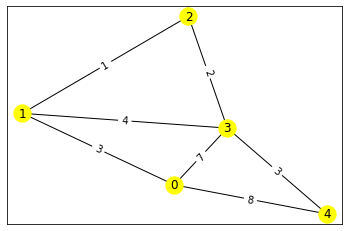

In [108]:
pos = nx.spring_layout(g3) 
nx.draw_networkx(g3, pos, node_color="yellow")

labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels)

plt.show()

In [97]:
m3 = nx.adjacency_matrix(g3).todense()

m3

matrix([[0, 3, 0, 7, 8],
        [3, 0, 1, 4, 0],
        [0, 1, 0, 2, 0],
        [7, 4, 2, 0, 3],
        [8, 0, 0, 3, 0]], dtype=int32)

In [98]:
nx.adjacency_data(g3)["adjacency"]

[[{'weight': 8, 'id': 4}, {'weight': 3, 'id': 1}, {'weight': 7, 'id': 3}],
 [{'weight': 3, 'id': 0}, {'weight': 1, 'id': 2}, {'weight': 4, 'id': 3}],
 [{'weight': 1, 'id': 1}, {'weight': 2, 'id': 3}],
 [{'weight': 7, 'id': 0},
  {'weight': 4, 'id': 1},
  {'weight': 2, 'id': 2},
  {'weight': 3, 'id': 4}],
 [{'weight': 8, 'id': 0}, {'weight': 3, 'id': 3}]]

Vejamos todos os caminhos:

In [119]:
import numpy as np

np.arange(5)+5

array([5, 6, 7, 8, 9])

In [131]:
np.array(list(labels.values()))*0.8

array([6.4, 2.4, 5.6, 0.8, 3.2, 1.6, 2.4])

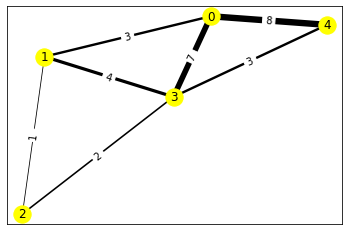

In [133]:
pos = nx.spring_layout(g3) 
nx.draw_networkx(g3, pos, node_color="yellow", width=np.array(list(labels.values()))*0.8)

labels = nx.get_edge_attributes(g3, 'weight')
nx.draw_networkx_edge_labels(g3, pos, edge_labels=labels)

plt.show()

In [109]:
[path for path in nx.all_simple_paths(g3, 1, 4)]

[[1, 0, 4],
 [1, 0, 3, 4],
 [1, 2, 3, 0, 4],
 [1, 2, 3, 4],
 [1, 3, 0, 4],
 [1, 3, 4]]

In [134]:
# todos os caminhos simples e as respectivas somas de pesos

[(path, 
  nx.path_weight(g3, path, weight="weight")) for path in nx.all_simple_paths(g3, 1, 4)]

[([1, 0, 4], 11),
 ([1, 0, 3, 4], 13),
 ([1, 2, 3, 0, 4], 18),
 ([1, 2, 3, 4], 6),
 ([1, 3, 0, 4], 19),
 ([1, 3, 4], 7)]

Considerando pesos para o menor caminho, temos dijkstra!

In [137]:
nx.dijkstra_path(g3, 1, 4)

[1, 2, 3, 4]

Caso queira saber o comprimento do menor caminho:

In [138]:
nx.dijkstra_path_length(g3, 1, 4)

6

In [139]:
(nx.dijkstra_path(g3, 1, 4), nx.dijkstra_path_length(g3, 1, 4))

([1, 2, 3, 4], 6)

__________

## Aquecimento pro projeto final

4. O grafo dos estados do Brasil é definido da seguinte forma:

- Cada vértice é um dos estados estados da República Federativa do Brasil
- Dois estados são adjacentes se têm uma fronteira comum

<img src=https://i.pinimg.com/originals/f6/f5/bd/f6f5bd6be91adf85b5a65d79706c8c4f.png width=400>

Com base nisso, faça um desenho desse grafo. 

Quantos vértices tem o grafo? 

Quantas arestas? 

Implemente este grafo com o networkx!!

# veja a resposta no gabarito da lista de grafos -- vai ajudar pro projeto final!

In [11]:
lista1 = """Estado 	Sigla
 Acre 	 AC
 Alagoas 	 AL
 Amapá 	 AP
 Amazonas 	 AM
 Bahia 	 BA
 Ceará 	 CE
 Distrito Federal 	 DF
 Espírito Santo 	 ES
 Goiás 	 GO
 Maranhão 	 MA
 Mato Grosso 	 MT
 Mato Grosso do Sul 	 MS
 Minas Gerais 	 MG
 Pará 	 PA
 Paraíba  	 PB
 Paraná 	 PR
 Pernambuco 	 PE
 Piauí 	 PI
 Rio de Janeiro 	 RJ
 Rio Grande do Norte 	 RN
 Rio Grande do Sul  	 RS
 Rondônia 	 RO
 Roraima 	 RR
 Santa Catarina  	 SC
 São Paulo  	 SP
 Sergipe 	 SE
 Tocantins 	 TO""".split("\n")

In [18]:
siglas = [item.split("\t")[1].strip() for item in lista1][1:]

In [ ]:
['AC', "NORTE"
 'AL', "nordeste"
 'AP',
 'AM',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MT',
 'MS',
 'MG',
 'PA',
 'PB',
 'PR',
 'PE',
 'PI',
 'RJ',
 'RN',
 'RS',
 'RO',
 'RR',
 'SC',
 'SP',
 'SE',
 'TO']

In [21]:
siglas

['AC',
 'AL',
 'AP',
 'AM',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MT',
 'MS',
 'MG',
 'PA',
 'PB',
 'PR',
 'PE',
 'PI',
 'RJ',
 'RN',
 'RS',
 'RO',
 'RR',
 'SC',
 'SP',
 'SE',
 'TO']

In [44]:
import networkx as nx

g1 = nx.Graph()

g1.add_node("a")
g1.add_node("b")
g1.add_node("c")

g1.add_edge("a", "b", weight = 5)
g1.add_edge("b", "c")
g1.add_edge("a", "c")

#######################

g2 = nx.Graph()

g2.add_node("a")
g2.add_node("b")
g2.add_node("d")

g2.add_edge("a", "b", weight = 10)
g2.add_edge("a", "d") 

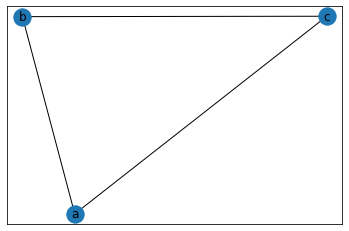

In [45]:
nx.draw_networkx(g1)

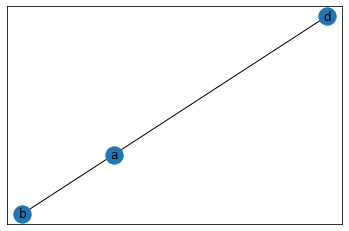

In [46]:
nx.draw_networkx(g2)

In [47]:
g3 = nx.compose(g1, g2)

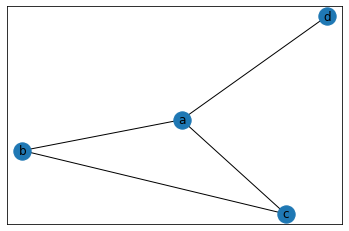

In [48]:
nx.draw_networkx(g3)

In [ ]:
# mini-projeto!


Pergunta adicional: faça uma função que receba dois estados, e que devolve o menor caminho entre eles (inicialmente, considere um grafo não-ponderado)

In [ ]:
# mini-projeto!


Construa agora um grafo ponderado, usando a [distância entre capitais dos estados](http://www.itatrans.com.br/distancia.html) como pesos! 

Construa novamente a função de menor caminho (como se fosse trechos de avião entre aeroportos das capitais!

In [ ]:
# mini-projeto! (se der tempo)


__________

5. Considere um determinado número de cidades (N) e uma determinada quantidade de rotas (M) que você sabe que existem entre aquelas cidades. Com base nisso, você deve criar um script em Python que recebe um número N de cidades e um número M de caminhos que existem entre elas. Em seguida, seu programa vai ler quais são esses M caminhos e a distância deles.

Para exemplificar, vamos analisar a entrada abaixo:

```
3 2  
0 1 10  
1 2 23  
```

O exemplo acima é bem simples. Os dois primeiros números são o N e o M; ou seja, existem 3 cidades e 2 caminhos conhecidos entre elas. Em seguida, temos os dois caminhos:

- O primeiro vai da cidade 0 para a cidade 1, cuja distância é de 10.
    
- O segundo vai da cidade 1 para a cidade 2, cuja distância é de 23.

Teste o seu programa para a entrada acima e, também, para a entrada abaixo:

```
7 11
0 1 7
0 3 5
1 2 8
1 3 9
1 4 7
2 4 5
3 4 15
3 5 6
4 5 8
4 6 9
5 6 11
```

Implemente o grafo da entrada acima de forma automática (sem fazer "na mão")!

# veja a resposta no gabarito da lista de grafos -- vai ajudar pro projeto final!

___________